In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

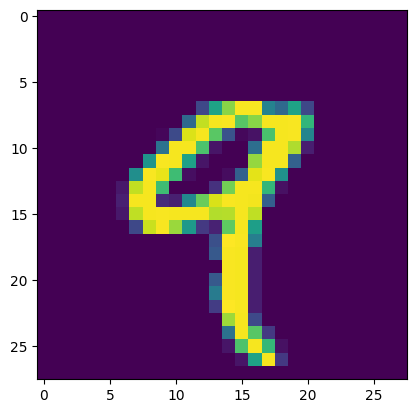

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[4])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0957 - val_accuracy: 0.9755
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.0971 - val_accuracy: 0.9763
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.1175 - val_accuracy: 0.9732
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.1173 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.1096 - val_accuracy: 0.9763
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.1241 - val_accuracy: 0.9733
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.1068 - val_accuracy:

In [20]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9756

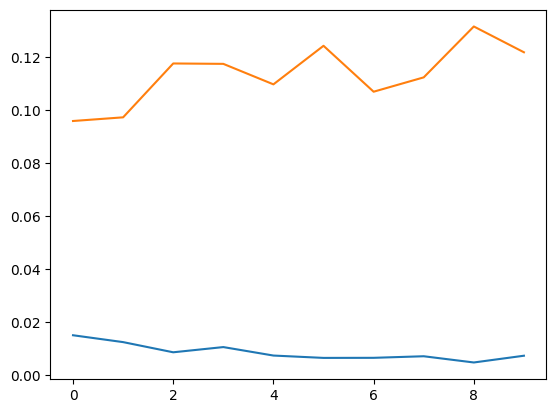

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

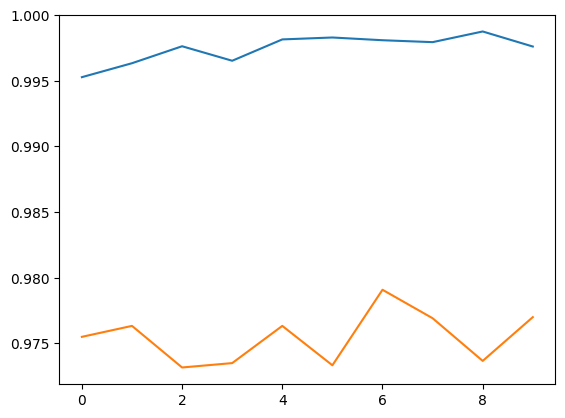

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])